## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [2]:
BoomBike = pd.read_csv('day.csv')
BoomBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspecting the Dataset

In [3]:
BoomBike.shape

(730, 16)

In [4]:
#checking the numeric columns summary
BoomBike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
BoomBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking for the Null-Values in Dataset
BoomBike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Removing the Columns which is not helpful in building the model
#1 instant --> Record Index is not useful so we can drop this column

#2 dteday --> This Column shows the date on which date the bike was rented which is explained by Month and Year column, so we can drop this

In [7]:
bb = BoomBike.drop(['instant','dteday'], axis=1)

#### Column 'temp' shows the actual temperture while 'atemp' is the temperature customer is feeling, we can check their coolinearity as they are almost same

In [8]:
bb['temp'].corr(bb['atemp'])

0.9916961786905648

#From above we can see that both the variable are highly coorelated. Since we are predicting customer response it's reasonable to keep 'atemp' and drop 'temp variable here

In [9]:
#Dropping 'temp' column
bb = bb.drop(['temp'], axis=1)


#### From the Data Dictionary we can see that 'cnt' column is the sum of 'registered' and 'casual'. These can be dropped as they are reflecting the target variable 'cnt' only

In [10]:
bb = bb.drop(['registered','casual'], axis=1)

In [11]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [12]:
#Season is a categorical variable, so converting it

def assign_season(x):
    return x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

bb[['season']] = bb[['season']].apply(assign_season) 
bb['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

### Doing the same for Month(mnth), Weekday, Weathersit columns

In [13]:
#Converting mnth column
def assign_month(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bb[['mnth']] = bb[['mnth']].apply(assign_month)
bb['mnth'].value_counts()

Mar    62
Jan    62
Jul    62
Oct    62
May    62
Aug    62
Dec    62
Nov    60
Jun    60
Sep    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [14]:
#Converting Weekday Column

def assign_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bb[['weekday']] = bb[['weekday']].apply(assign_weekday)
bb['weekday'].value_counts()

Mon    105
Tue    105
Sat    104
Sun    104
Fri    104
Wed    104
Thu    104
Name: weekday, dtype: int64

In [15]:
#Converting weathersit column
def assign_weathersit(x):
    return x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

bb[['weathersit']] = bb[['weathersit']].apply(assign_weathersit)
bb['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [16]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,11.46350,43.6957,12.522300,1600


### Categorical Variable Analysis

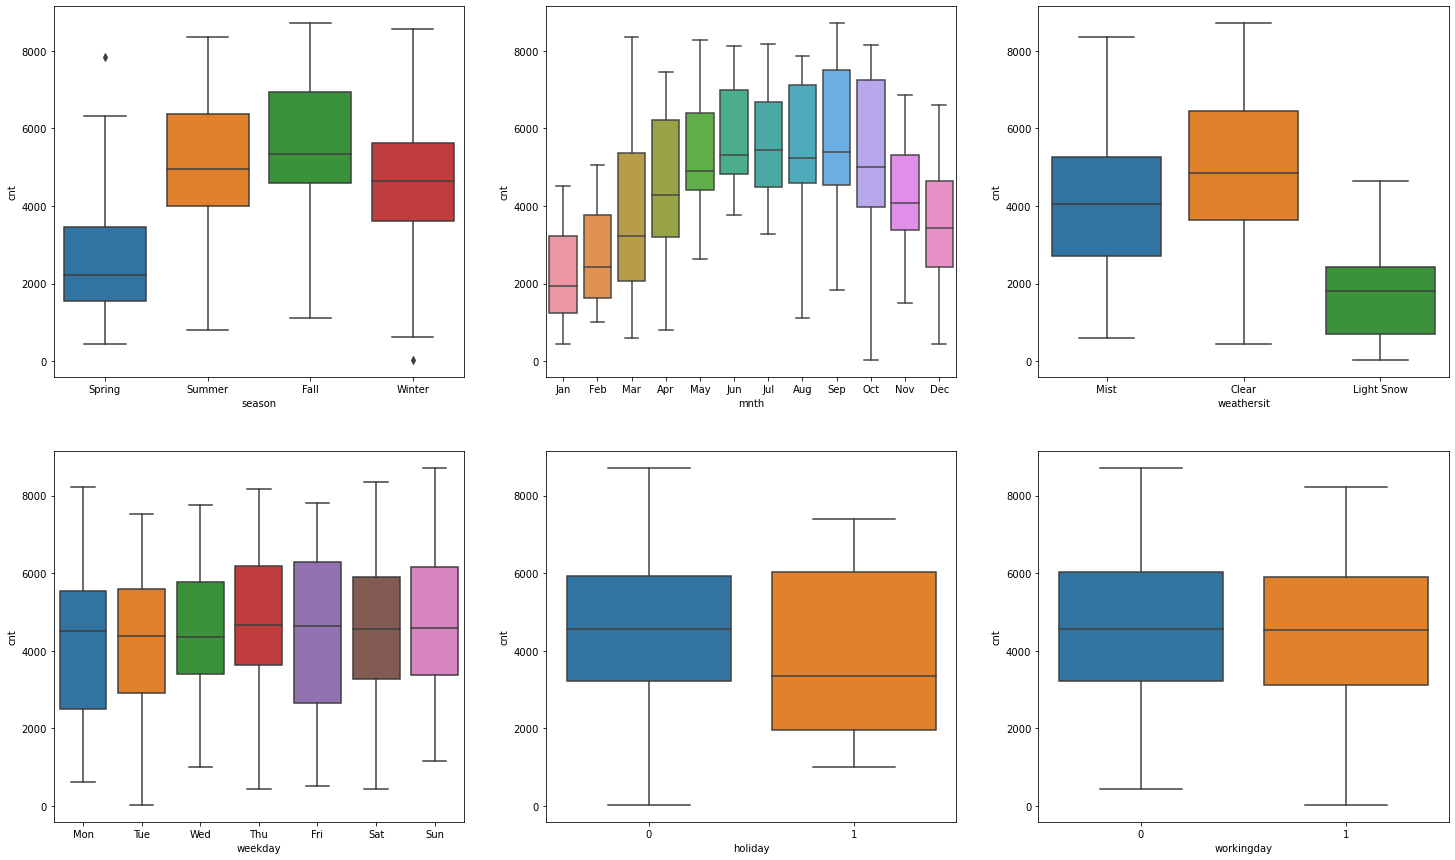

In [17]:
#Making Boxplot for all the Categorical Variables against Target Variable 'CNT'

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bb)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bb)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bb)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bb)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bb)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bb)
plt.show()

### Inferences
1. Fall has the highest number of bike booking with median of over 5000, followed by summer and winter, Spring have least number of bike booking. This indicates that Season is a good predictor of Target Variable
2. Bike booking starts slow in Jan to Mar month and highest in Sept, then again start going downhill till Dec
3. Weathersit VS CNT shows that majority of customer like to book bike when the weather is Clear followed by Mist and least prefer when there is Light Snow. This column can be a good predictor of Target Variable. Also we don't have any data fro Heavy Snow
4. Weekday shows very close trend with target variable, having similar booking of everyday with each median ranging b/w 4000-5000 booking
5. Median count of Bike rentals on Holiday is less than non holidays.
6. Working Day seems to have not much impact on counts. the data seems to have equal distribution.

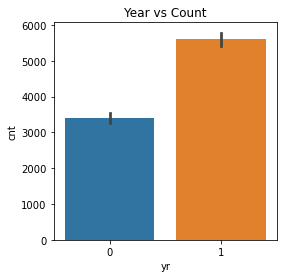

In [18]:
# Year V/S CNT Variable
plt.figure(figsize=(4,4))
sns.barplot('yr','cnt',data=bb)
plt.title("Year vs Count")
plt.show()

#From above plot we can see that the demand for bike has increased significantly in 2019 than what it was in year 2018

## Numerical Variable Analysis

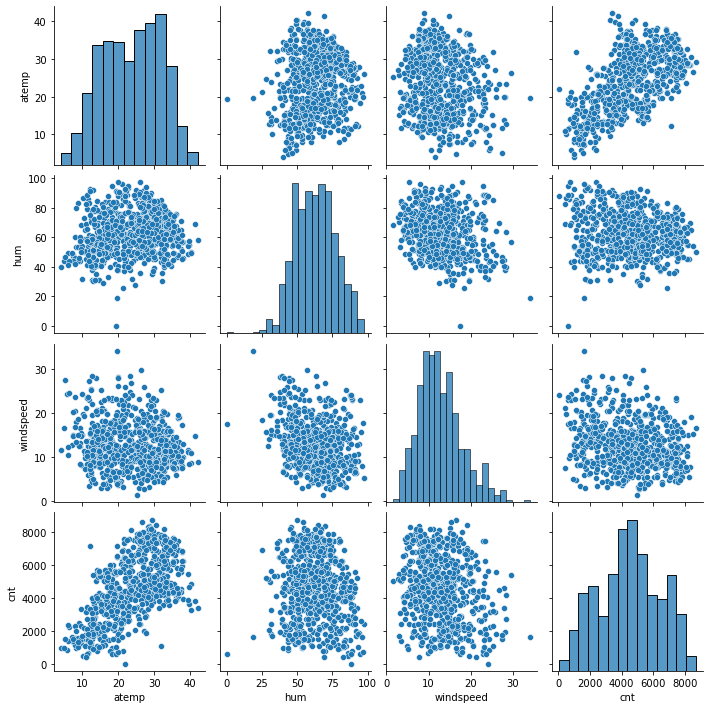

In [19]:
#Making Paitplot for all the Numerical Variable 
bb_num_var = bb[['atemp','hum','windspeed','cnt']]
sns.pairplot(bb_num_var)
plt.show()

### There is a linear trend visible between 'atemp' and 'cnt' variable, whereas 'hum' and 'windspeed' does not show any such visible trend. Also we can see that all the variable are normally distributed

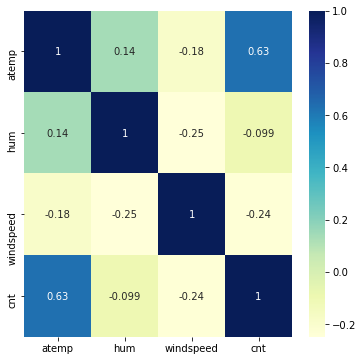

In [20]:
#Chekcing Correlation Between the Variables
plt.figure(figsize=(6,6))
sns.heatmap(bb_num_var.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Inferences
Looking at the correlation between Count and Temperature, seems like Higher temperatures lead to an increasing number of bike rents and lower temperatures decrease the number of rents.
Humidity and Windspeed shows negative correlation

## Data Preparation
### Creating Dummy Variable for the Categorical Columns

In [21]:
#creating dummyvariable for all the categorical columns
bb_cat_var  = bb[['season','mnth','weekday','weathersit']]

bb_dummie = pd.get_dummies(bb_cat_var, drop_first=True)
bb_dummie.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Merging the dummies with origin dataframe
bb1 = pd.concat([bb,bb_dummie], axis=1)

bb1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,Spring,0,Jan,0,Mon,1,Mist,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,1,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Removing the redundant columns
bb1.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)
bb1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
bb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   atemp                  730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_Spring          730 non-null    uint8  
 8   season_Summer          730 non-null    uint8  
 9   season_Winter          730 non-null    uint8  
 10  mnth_Aug               730 non-null    uint8  
 11  mnth_Dec               730 non-null    uint8  
 12  mnth_Feb               730 non-null    uint8  
 13  mnth_Jan               730 non-null    uint8  
 14  mnth_Jul               730 non-null    uint8  
 15  mnth_J

### Splitting the Data into Train and Test Set

In [25]:
#splitting the data into train and test set in 70-30 ratio respectively
np.random.seed(0)
bb1_train, bb1_test = train_test_split(bb1 , train_size = 0.7, random_state = 100)
print(bb1_train.shape)
print(bb1_test.shape)

(510, 29)
(220, 29)


## Rescaling the Numerical Feature of Training Set with MinMax Scaling


In [26]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()

num_var = ['atemp','hum','windspeed','cnt']

bb1_train[num_var] = scaler.fit_transform(bb1_train[num_var])

bb1_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


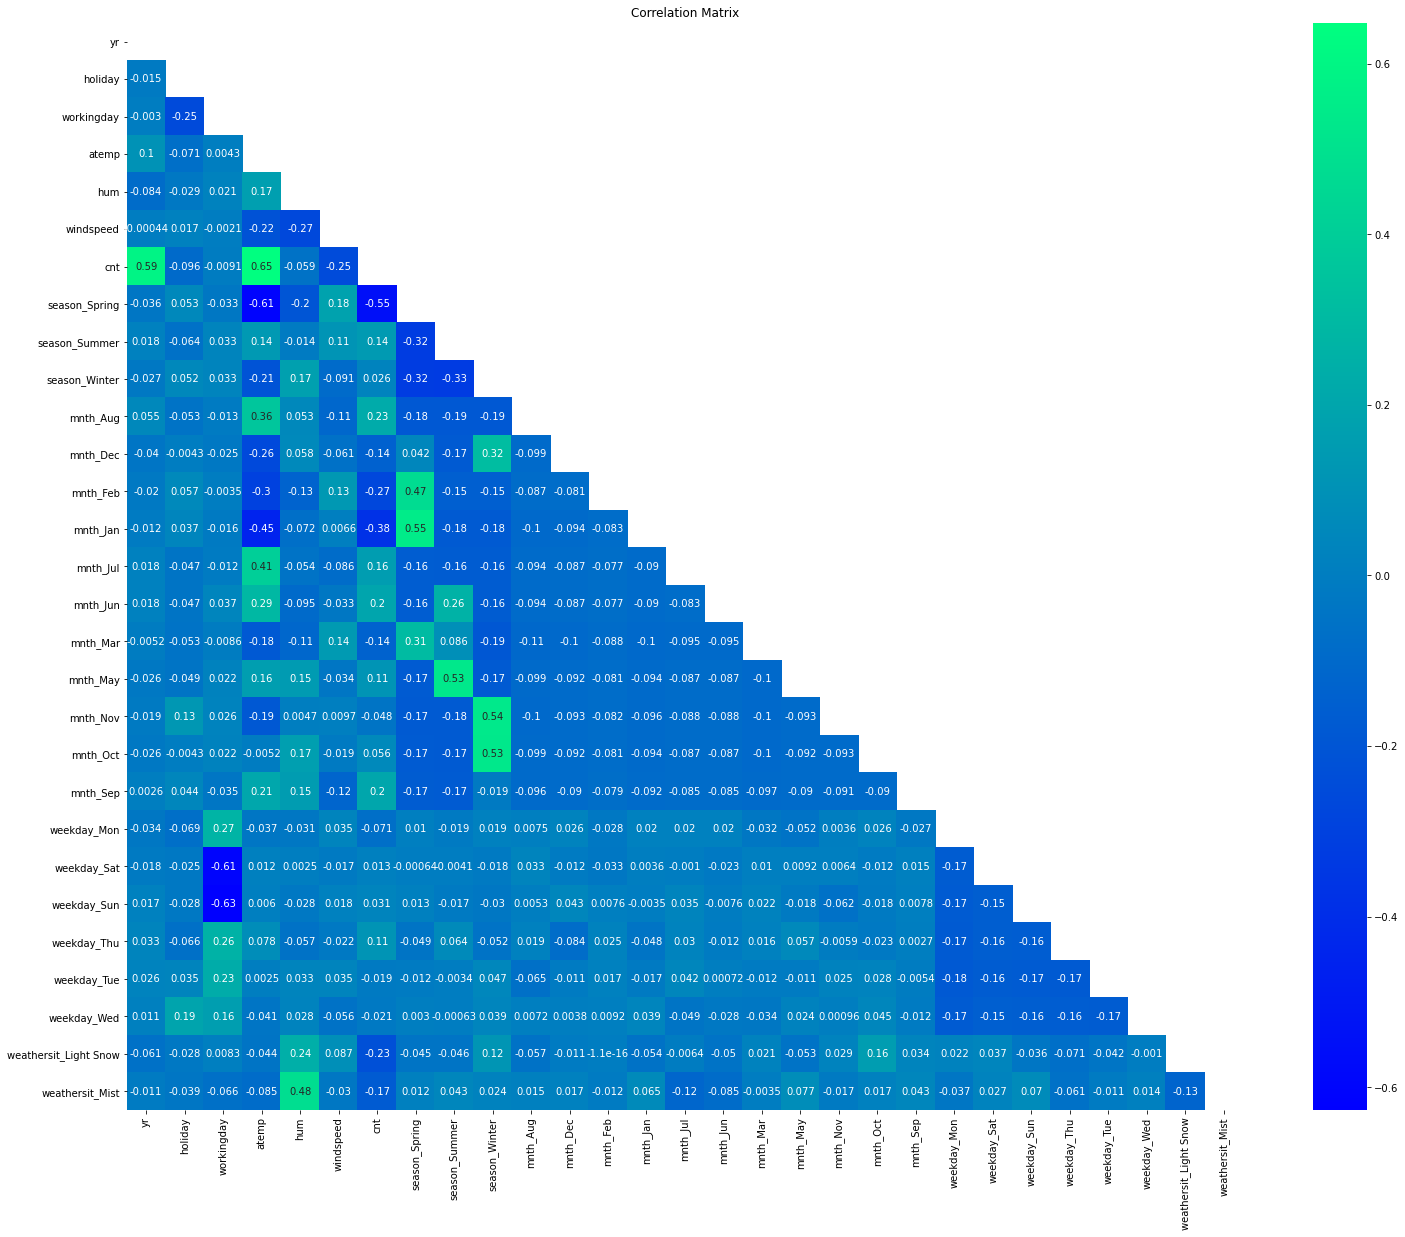

In [27]:
#Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,20))

mask = np.triu(np.ones_like(bb1_train.corr(), dtype=bool))

sns.heatmap(bb1_train.corr(), annot=True, cmap='winter', mask=mask)
plt.title("Correlation Matrix")
plt.show()

### Inferences
1. Year(yr) & 'atemp' are highly correlated with Target variable 'CNT'
2. 'Season_Spring' has high negative correlation with 'CNT'
3. Humidity('hum') has high correlation with 'weathersit_Mist'
4. 'mnth_Oct' & 'mnth_Nov' are highly correlated with 'season_Winter'
5. 'mnth_may' & 'season_Summer' are highly correlated

### Dividing into X and Y sets for the model building

In [28]:
y_train = bb1_train.pop('cnt')
X_train = bb1_train

## Building our Linear Model
We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', False, 5),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [31]:
#Storing the selected variable in list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [32]:
#Checking which columns have been eliminated
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Spring', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

In [35]:
# Running the first fitted linear model
Linear_Model_1 = sm.OLS(y_train,X_train_sm).fit() 

In [36]:
#Looking at the summary of the Model Created
print(Linear_Model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.92e-186
Time:                        01:49:08   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

### Inferences
R-Squared and adjusted R-Squared are 0.84 & 0.83 which is good. The p-values of selected feature are lower than 0.05. Some of the variables have negative coefficients

In [37]:
# Calculate the VIF for the model

vif = pd.DataFrame()
X = X_train_sm
X.drop(['const'], axis=1, inplace=True)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.06
2,atemp,14.42
4,windspeed,3.90
6,season_Winter,3.04
5,season_Summer,2.29
14,weathersit_Mist,2.24
0,yr,2.06
10,mnth_Jan,1.92
11,mnth_Nov,1.87
8,mnth_Dec,1.64


### We can see that `Humidity(hum)` has high Vif 25.06 and atemp has vif of 14.42. Since atemp is a good predictor of out Target variable so is does not make any sense to drop it. Dropping 'hum' column and checking is the VIF varies 

In [38]:
X_train_new = X_train_sm.drop(["hum"], axis = 1)

Rebuilding the model without `hum` column

In [39]:
# Adding a constant variable 
X_train_Final = sm.add_constant(X_train_new)

In [40]:
# Running the first fitted linear model
Linear_Model_Final = sm.OLS(y_train,X_train_Final).fit() 

In [41]:
#Looking at the summary of the Model Created
print(Linear_Model_Final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.01e-183
Time:                        01:49:09   Log-Likelihood:                 498.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     495   BIC:                            -903.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [42]:
#Checking the parameters
Linear_Model_Final.params

const                    0.209739
yr                       0.235087
holiday                 -0.085034
atemp                    0.444625
windspeed               -0.149067
season_Summer            0.073814
season_Winter            0.122559
mnth_Aug                 0.057967
mnth_Dec                -0.056684
mnth_Feb                -0.055846
mnth_Jan                -0.086838
mnth_Nov                -0.041808
mnth_Sep                 0.104766
weathersit_Light Snow   -0.286308
weathersit_Mist         -0.081436
dtype: float64

In [43]:
# Calculate the VIF for the model

vif = pd.DataFrame()
X = X_train_Final
X.drop(['const'], axis=1, inplace=True)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,season_Winter,2.63
0,yr,2.06
4,season_Summer,2.06
10,mnth_Nov,1.82
6,mnth_Aug,1.59
13,weathersit_Mist,1.57
7,mnth_Dec,1.41
11,mnth_Sep,1.35


### Inferences
1. This is our Final Model as the P-values are less than 0.05 and VIF of features are less than 5
2. R-squared of the model(83.5%) and adjusted R-sqaured(83.0%) indicate that the selected 14 features are significant for prediction.
3. P(F-statistic) of the model is nearly 0 which indicates that this model is a good fit.
4. 'atemp' have highest coeffcient 0.44 shows that as temp increases, bike count increases
5. 'yr' also shows that bike demand have increased over year


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [44]:
X_train_res = sm.add_constant(X_train_Final)
y_train_cnt = Linear_Model_Final.predict(X_train_res)

res = y_train - y_train_cnt

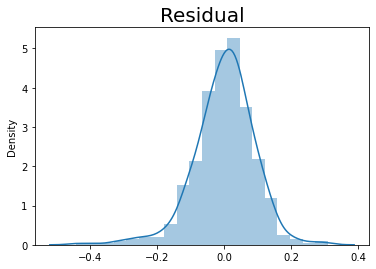

In [45]:
# Plot the histogram of the error terms
sns.distplot((res), bins = 20)
plt.title('Residual', fontsize = 20)
plt.show()

### We can observe that Residual follows Normal Distribution and is centered around 0.0

## Making Predictions
#### Applying the scaling on the test sets

In [46]:
num_var  = ['atemp', 'hum', 'windspeed','cnt']

bb1_test[num_var] = scaler.transform(bb1_test[num_var])
bb1_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
# Dividing into X_test and y_test
y_test = bb1_test.pop('cnt')
X_test = bb1_test

In [48]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_Final.columns]

# Adding a constant variable 
X_test_Final = sm.add_constant(X_test_new)

In [49]:
# Making predictions
y_pred = Linear_Model_Final.predict(X_test_Final)

## Model Evaluation

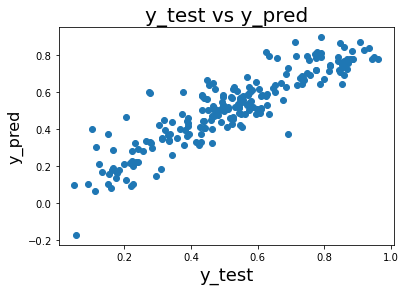

In [50]:
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show()

### We can see that the equation of our bet fitted line is:-

`cnt` = 0.21 +0.24*`yr` -0.09*`holiday` +0.45*`atemp` -0.15*`` +0.07*`season_Summer` +0.12*`season_Winter` +0.06*`mnth_Aug`    -0.06*`mnth_Dec` -0.06*`mnth_Feb` -0.09*`mnth_Jan` -0.04*`mnth_Nov` +0.11*`mnth_Sep` -0.29*`weathersit_Light_Snow` 
-0.09*`weathersit_Mist`

### From the Final Model we can conclude that:
1. `Year(yr)` having coefficient 0.24 means that over the year the number of rental bike is increasing
2. Temperature felt by a customer `atemp` has high significance in determining the rental bike with coefficient of 0.45
3. `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds` these weather situation deters people from renting bike as it has negative coefficient of -0.29

In [51]:
#Calsulating the R2_Score
R2_Score = round(r2_score(y_test, y_pred),4)
R2_Score

0.8067